## Case Study
#### Following scenarios will be covered 
1. Importing required libararies 
2. Data preprocessing, feature engineering 
3. Analysis of the sales for category furniture using Order Data
4. Creating Arima model ( Best parameter selection using AIC values) 
5. Create model and predict values and compare it with other parameters
5. Create a comparison model between furniture and office suplies 
7. Crete a new model using facebook (prophet model)


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
f_sales = df[df.Category == 'Furniture']

In [4]:
f_sales.shape

(2121, 21)

In [5]:
f_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
f_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [7]:
f_sales['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [8]:
f_sales['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

#### here we have 4 years of the data for sales 

In [9]:
### Data Preprocessing 

In [10]:
f_sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
f_sales = f_sales.copy()[['Order Date','Sales']]

In [12]:
f_sales = f_sales.sort_values('Order Date')

In [13]:
f_sales

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [14]:
f_sales = f_sales.groupby("Order Date")['Sales'].sum().reset_index()

In [15]:
f_sales = f_sales.set_index('Order Date')
f_sales.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [16]:
# upsampling => minutes to seconds (increasing the rows )
# downsampling => seconds to minutes ( decreasing the rows)
y = f_sales['Sales'].resample('MS').mean()

In [17]:
f_sales.resample('MS').count()


,Sales
Order Date,
2014-01-01,13
2014-02-01,5
2014-03-01,17
2014-04-01,14
2014-05-01,16
2014-06-01,19
2014-07-01,18
2014-08-01,16
2014-09-01,24


### visualising furniture sales (time series data)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'


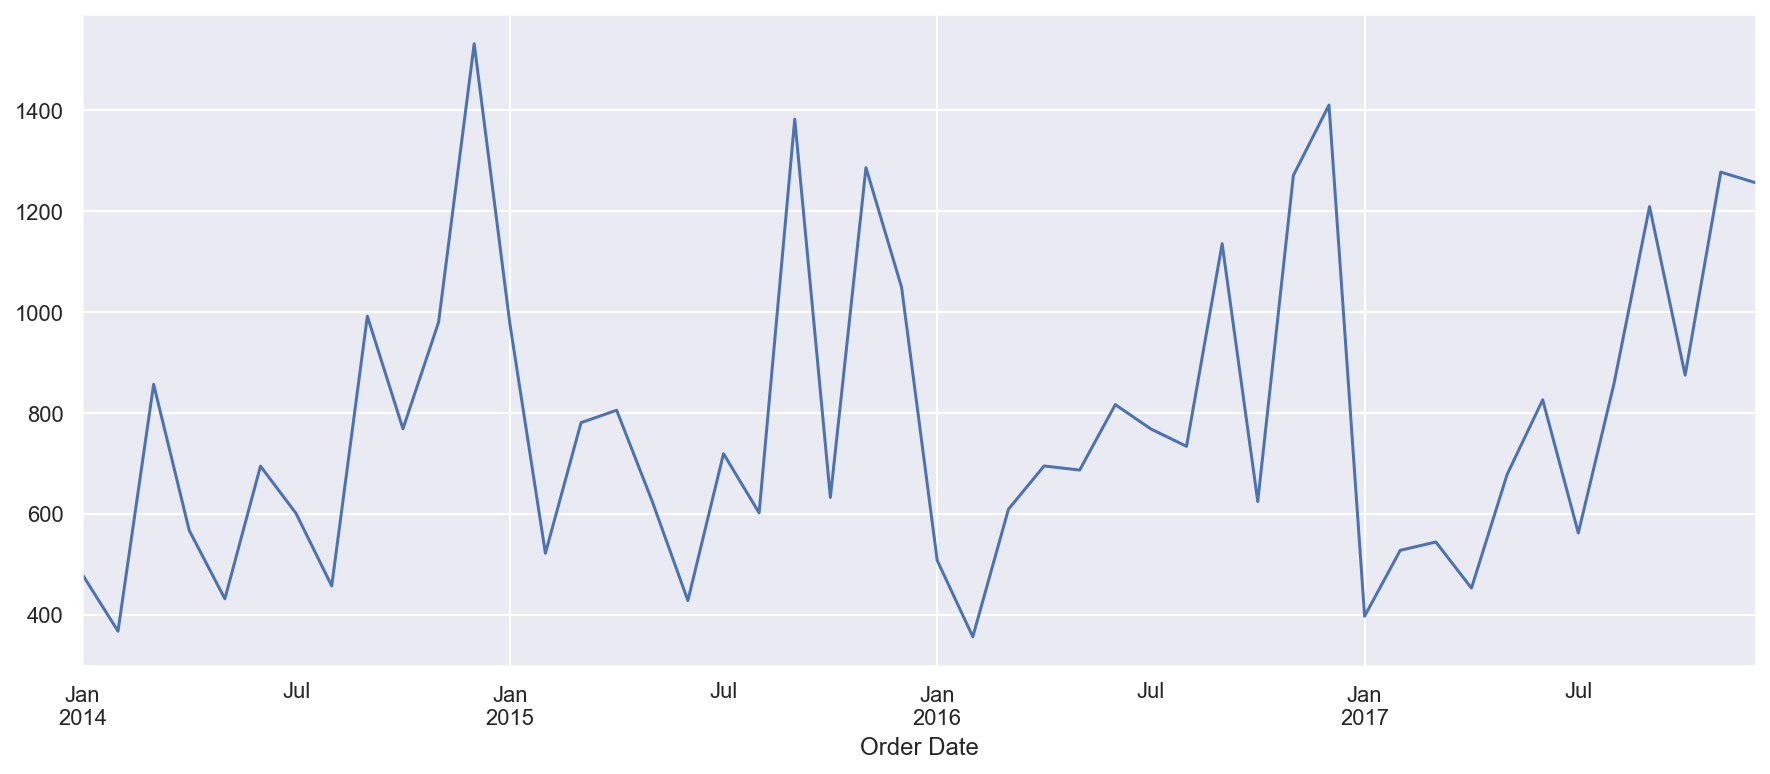

In [19]:
y.plot(figsize = (15,6))
plt.show()

In [20]:
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

In [22]:
# breaking the time series (decomposing)
# systematic (which can be modelled )
# unsystematic (which cant be modelled, noise)
# level( average value of the series )
# trend( increasing and decreasing values of the series )
# seasonality ( repetiting short term cycle in series )
# noise( random variation of series is noise )
# we can combine these things (additively nd multiplicatively)
# y(t) = level+trend+seasonality+ noise # (additively)




In [23]:
import statsmodels.api as sm

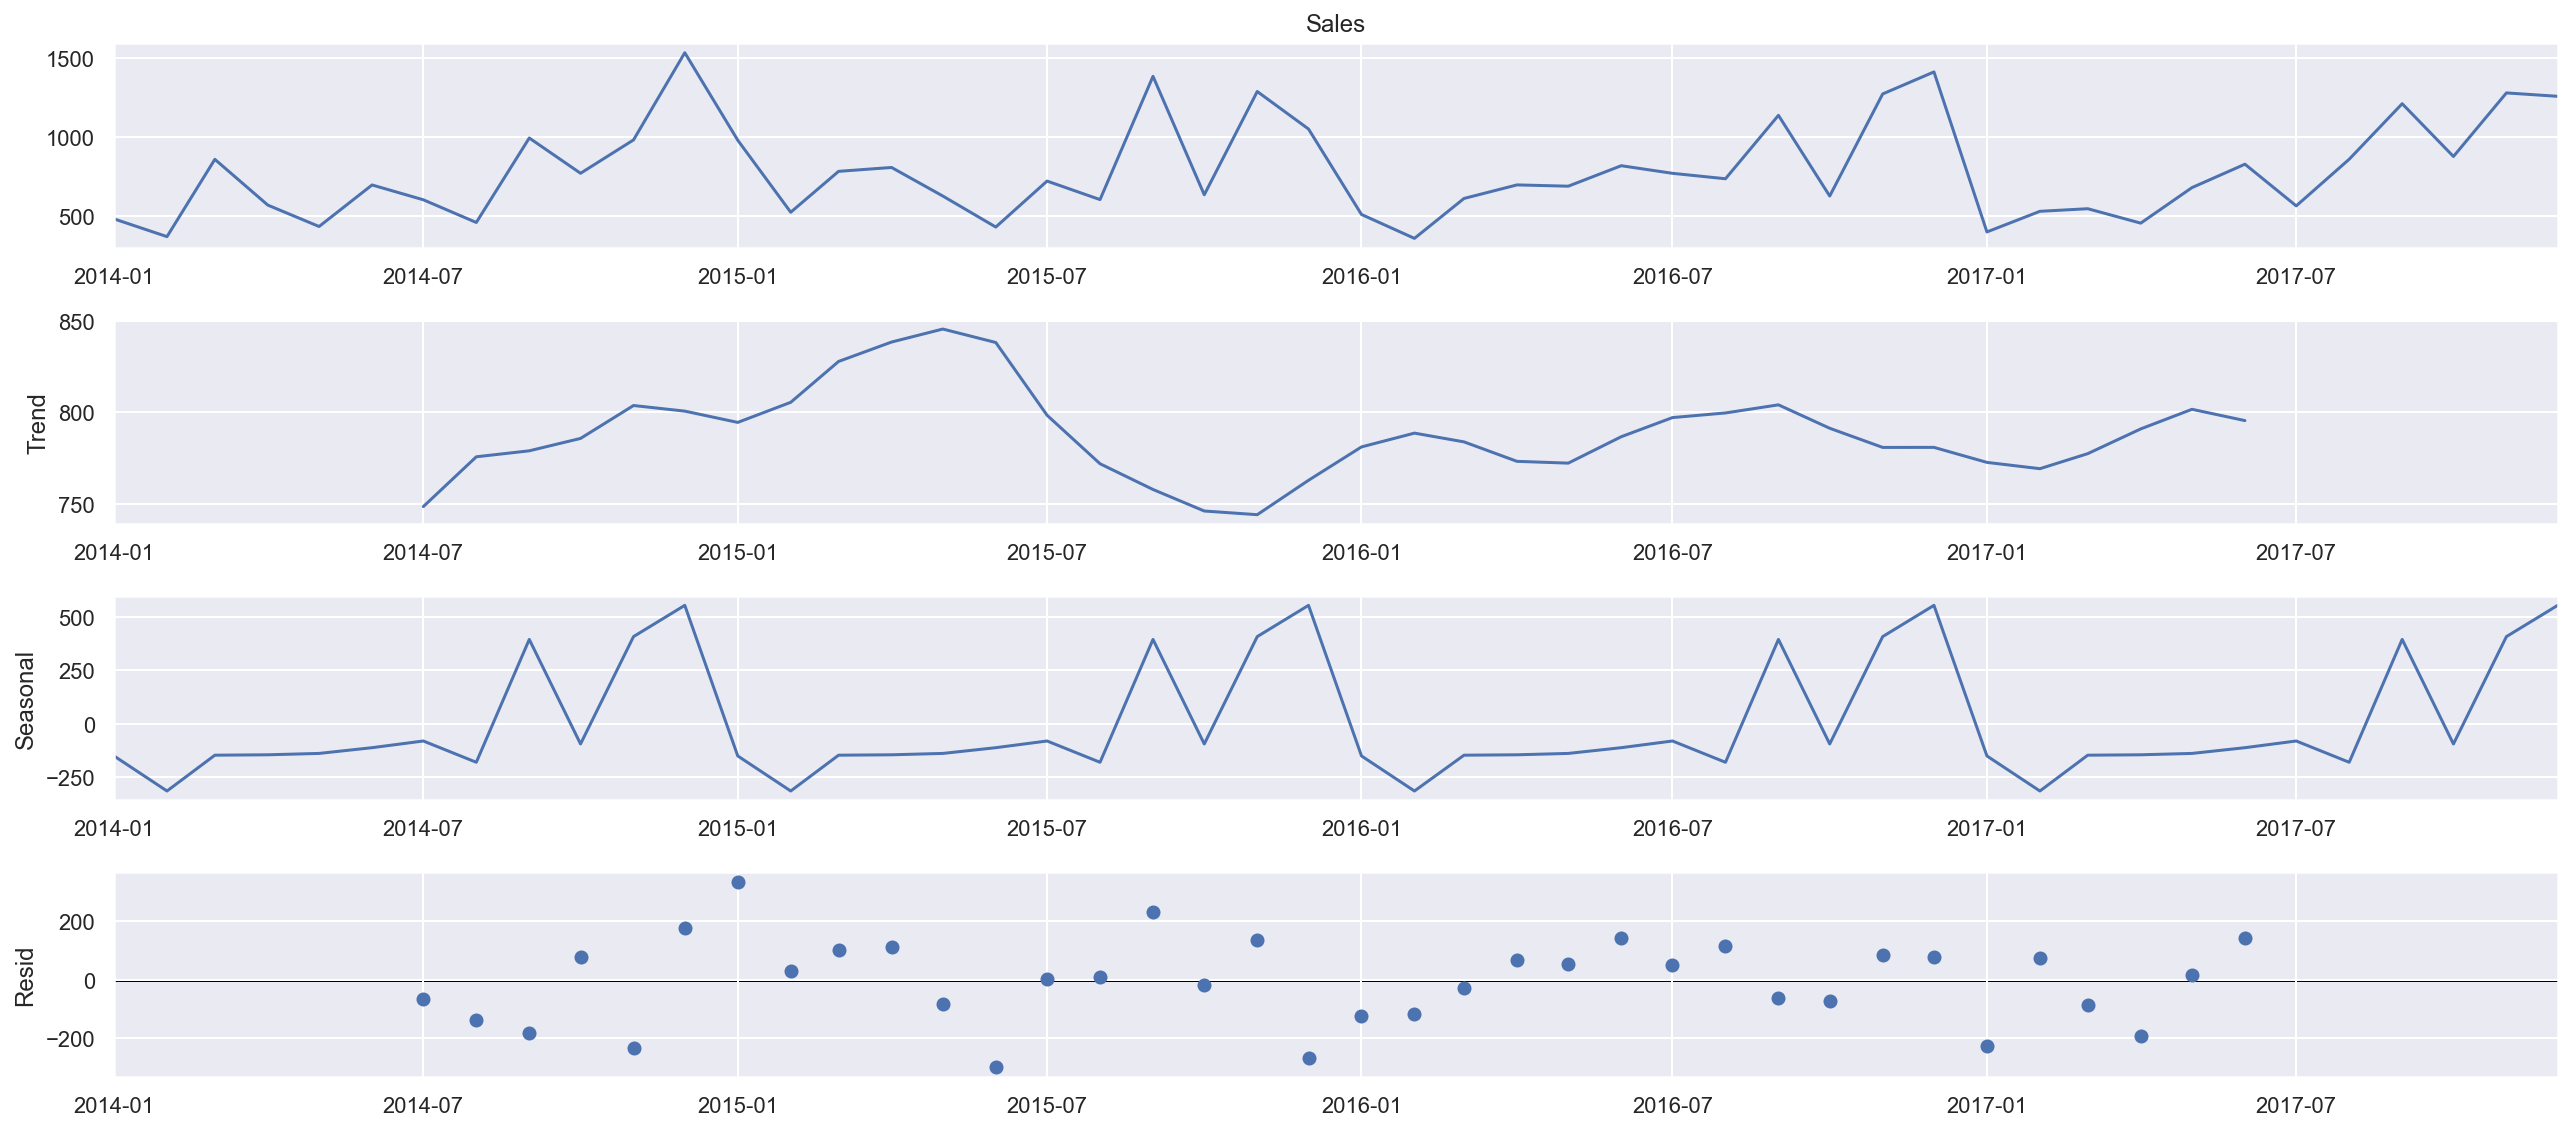

In [24]:
decomposition = sm.tsa.seasonal_decompose(y,model = 'additive')
fig = decomposition.plot()
plt.show()

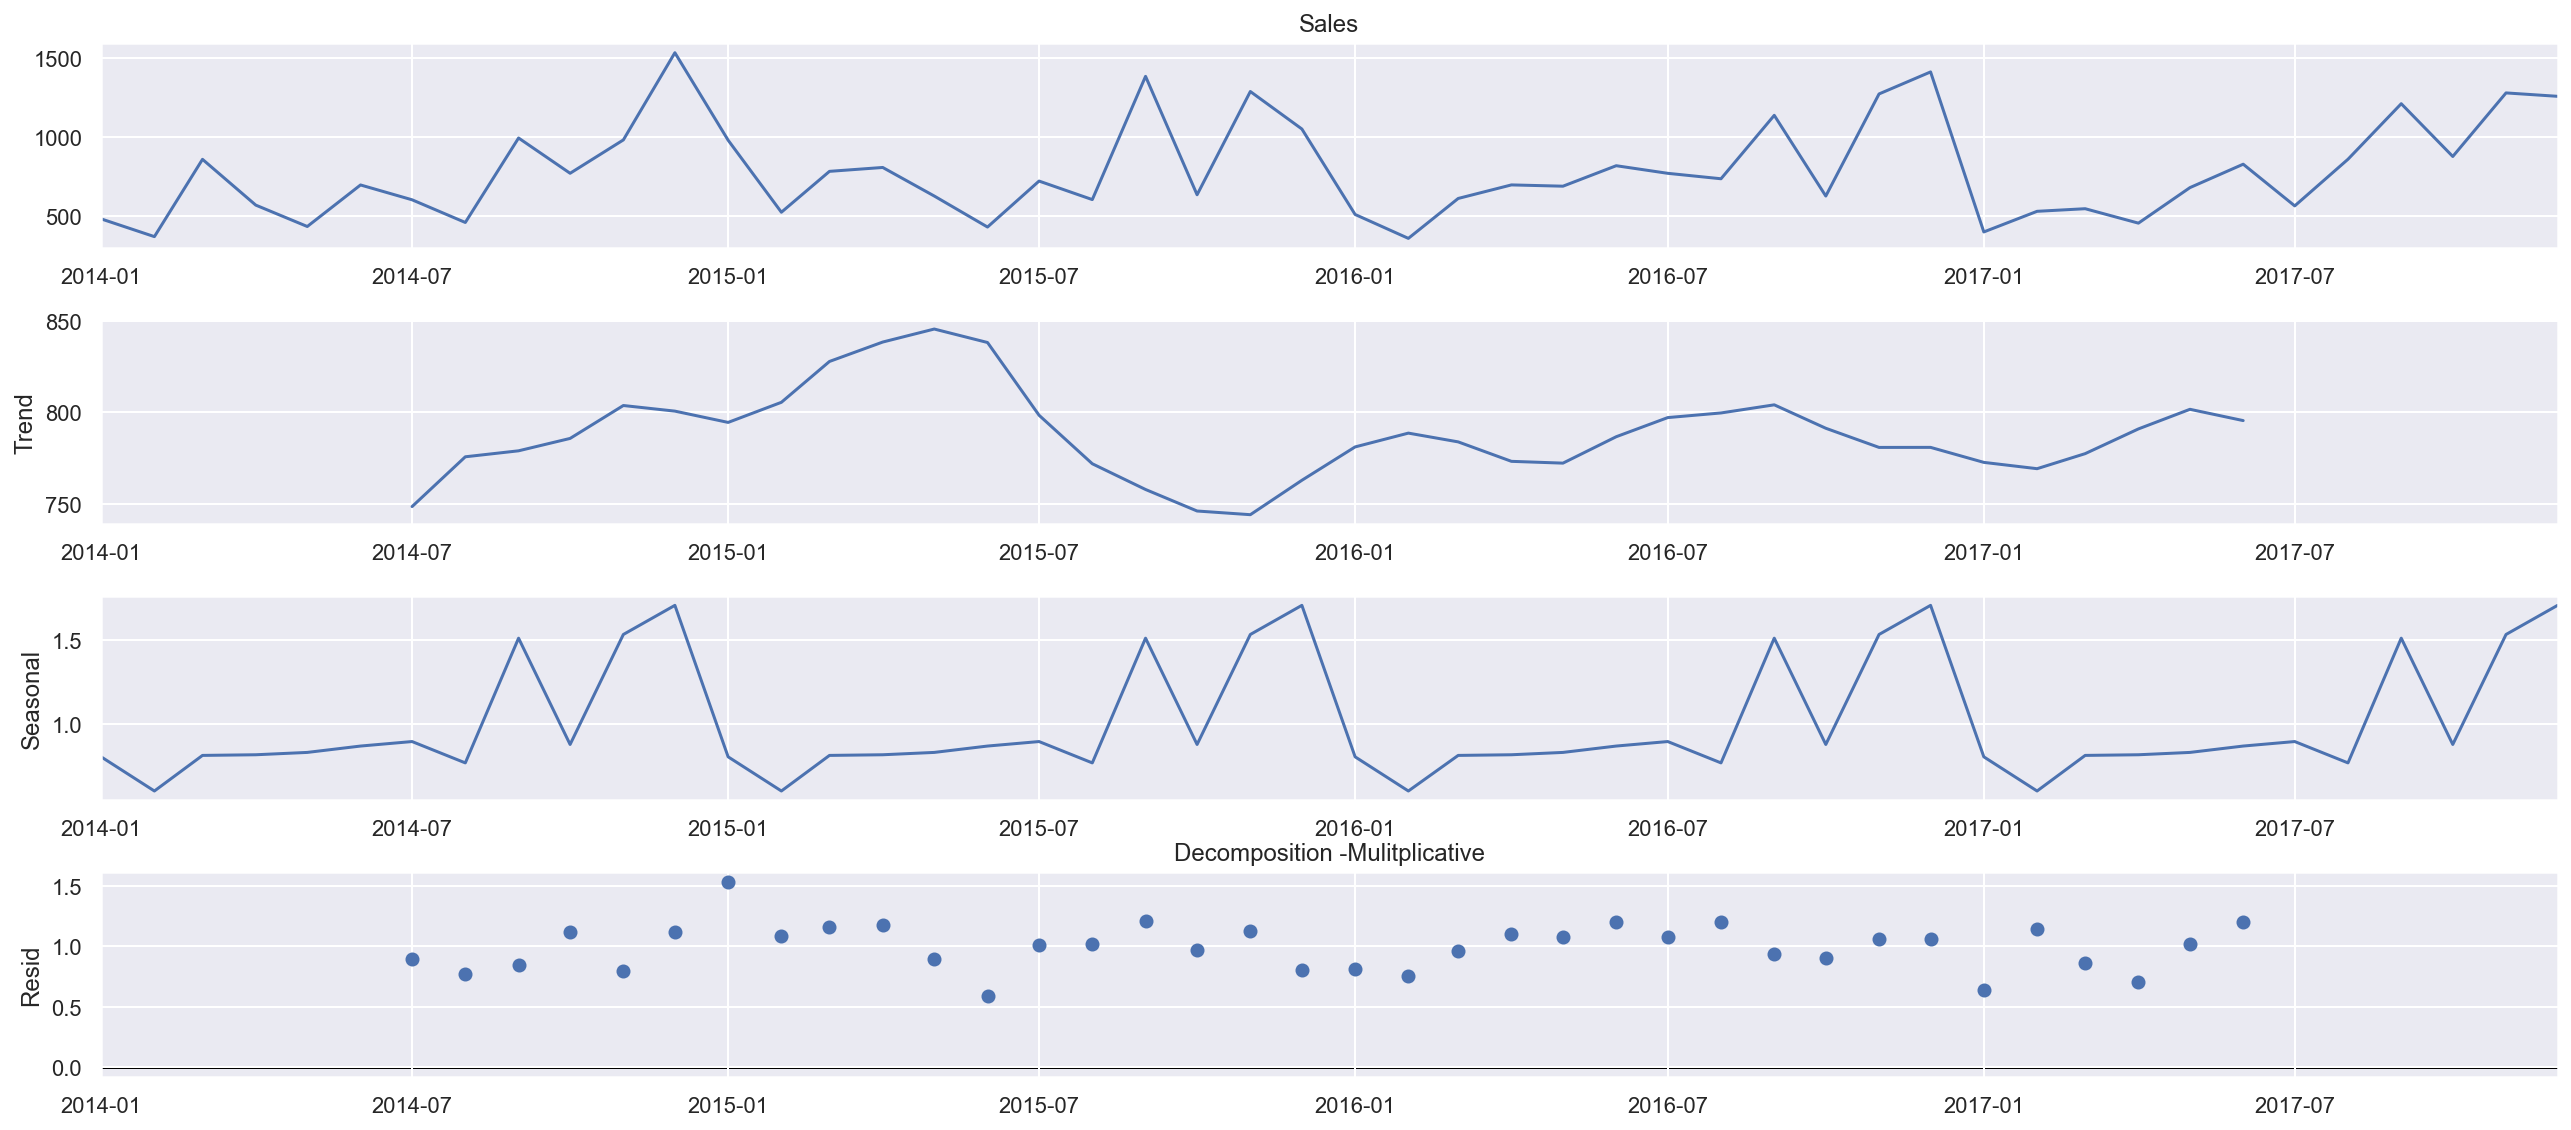

In [25]:
decomposition = sm.tsa.seasonal_decompose(y,model = 'multiplicative')
fig = decomposition.plot()
plt.title('Decomposition -Mulitplicative')
plt.show()

* Trend: An increase or decrease in data over a period of time is called a trend.
* Seasonal: Oftentimes, seasonality is of a fixed and known frequency. For example, seasonal factors like the time of the year or the day of the week, a seasonal pattern occurs.
* Cyclic: When a data exhibit fluctuates, a cycle occurs. But unlike seasonal, it is not of a fixed frequency.

### ARIMA MODEL FOR TIME SERIES FORECASTING

most commonly used model for timeseries forecasting 

auto regressive intregrated moving average 

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

##### The parameters of the ARIMA model are defined as follows:

* p: The number of lag observations included in the model, also called the lag order.(incorporate past values on model) 
* d: The number of times that the raw observations are differenced, also called the degree of differencing.(integrated part of model => difference in values and its effect )
* q: The size of the moving average window, also called the order of moving average.( it allows us to set error in the model) 


 ##### there are two ways to select p,d,q => 
 * 1. by using correlation and partial correlation graphs  by making data stationary 
 * 2. by using grid search and run for all possible combination and then select

In [26]:
# SARIMAX = > model based on ARIMA
# seasonal autoregressor moving average with exonus moving average 
# arima components => p, d, q ( all are integers )


In [27]:
import itertools
# selecting 12 because that will be a one season 12 months 
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in list(itertools.product(p,d,q))]

In [28]:
print(seasonal_pdq)

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [29]:
print('Example of parameter combinations for ARIMA')
print('SARIMAX: {} x{}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x{}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x{}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x{}'.format(pdq[2], seasonal_pdq[4]))

Example of parameter combinations for ARIMA
SARIMAX: (0, 0, 1) x(0, 0, 1, 12)
SARIMAX: (0, 0, 1) x(0, 1, 0, 12)
SARIMAX: (0, 1, 0) x(0, 1, 1, 12)
SARIMAX: (0, 1, 0) x(1, 0, 0, 12)


#### lower AIC score means best parameters for p,d,q

In [31]:
train = y[:26]
test = y[26:]
from sklearn.metrics import mean_squared_error

In [40]:
from warnings import filterwarnings
filterwarnings('ignore')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod  = sm.tsa.statespace.SARIMAX(train,order = param, 
                                             seasonal_order=param_seasonal,
#                                              enforce_stationarity=False, 
#                                              enforce_invertibility= False
                                            )
            results = mod.fit()
            y_pred = results.get_forecast(steps = 22).predicted_mean
            error = np.sqrt(mean_squared_error(test, y_pred))
          
            print('ARIMA {}*{}12 - AIC:{} error{}'.format(param,param_seasonal, results.aic, np.round(error)))
        except:
            continue


ARIMA (0, 0, 0)*(0, 0, 0, 12)12 - AIC:423.8620412923011 error879.0
ARIMA (0, 0, 0)*(0, 0, 1, 12)12 - AIC:412.0054820275599 error754.0
ARIMA (0, 0, 0)*(0, 1, 0, 12)12 - AIC:201.0353482706719 error215.0
ARIMA (0, 0, 0)*(0, 1, 1, 12)12 - AIC:200.576064602122 error182.0
ARIMA (0, 0, 0)*(1, 0, 0, 12)12 - AIC:397.31757748384956 error230.0
ARIMA (0, 0, 0)*(1, 0, 1, 12)12 - AIC:397.2137440148824 error184.0
ARIMA (0, 0, 0)*(1, 1, 0, 12)12 - AIC:192.57884775326406 error243.0
ARIMA (0, 0, 0)*(1, 1, 1, 12)12 - AIC:194.57069056501823 error244.0
ARIMA (0, 0, 1)*(0, 0, 0, 12)12 - AIC:409.0062271615395 error877.0
ARIMA (0, 0, 1)*(0, 0, 1, 12)12 - AIC:399.79131542628454 error753.0
ARIMA (0, 0, 1)*(0, 1, 0, 12)12 - AIC:202.64153298040333 error213.0
ARIMA (0, 0, 1)*(0, 1, 1, 12)12 - AIC:202.41820634835264 error183.0
ARIMA (0, 0, 1)*(1, 0, 0, 12)12 - AIC:393.4649472723491 error267.0
ARIMA (0, 0, 1)*(1, 0, 1, 12)12 - AIC:394.1459983347472 error193.0
ARIMA (0, 0, 1)*(1, 1, 0, 12)12 - AIC:194.5764821611992 e

In [ ]:
ARIMA (0, 1, 1)*(1, 0, 1, 12)12 - AIC:363.4615060147833 error180.0

In [41]:
model = sm.tsa.statespace.SARIMAX(y, order = (0,1,1), seasonal_order=(1,0,1,12), 
#                                  enforce_stationarity=False,
#                                   enforce_invertibility=False, 
                                 )
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.296     -3.378      0.001      -1.580      -0.420
ar.S.L12       0.9954      0.004    275.255      0.000       0.988       1.002
ma.S.L12      -0.8518      0.060    -14.315      0.000      -0.968      -0.735
sigma2      3.041e+04   9.58e-06   3.18e+09      0.000    3.04e+04    3.04e+04


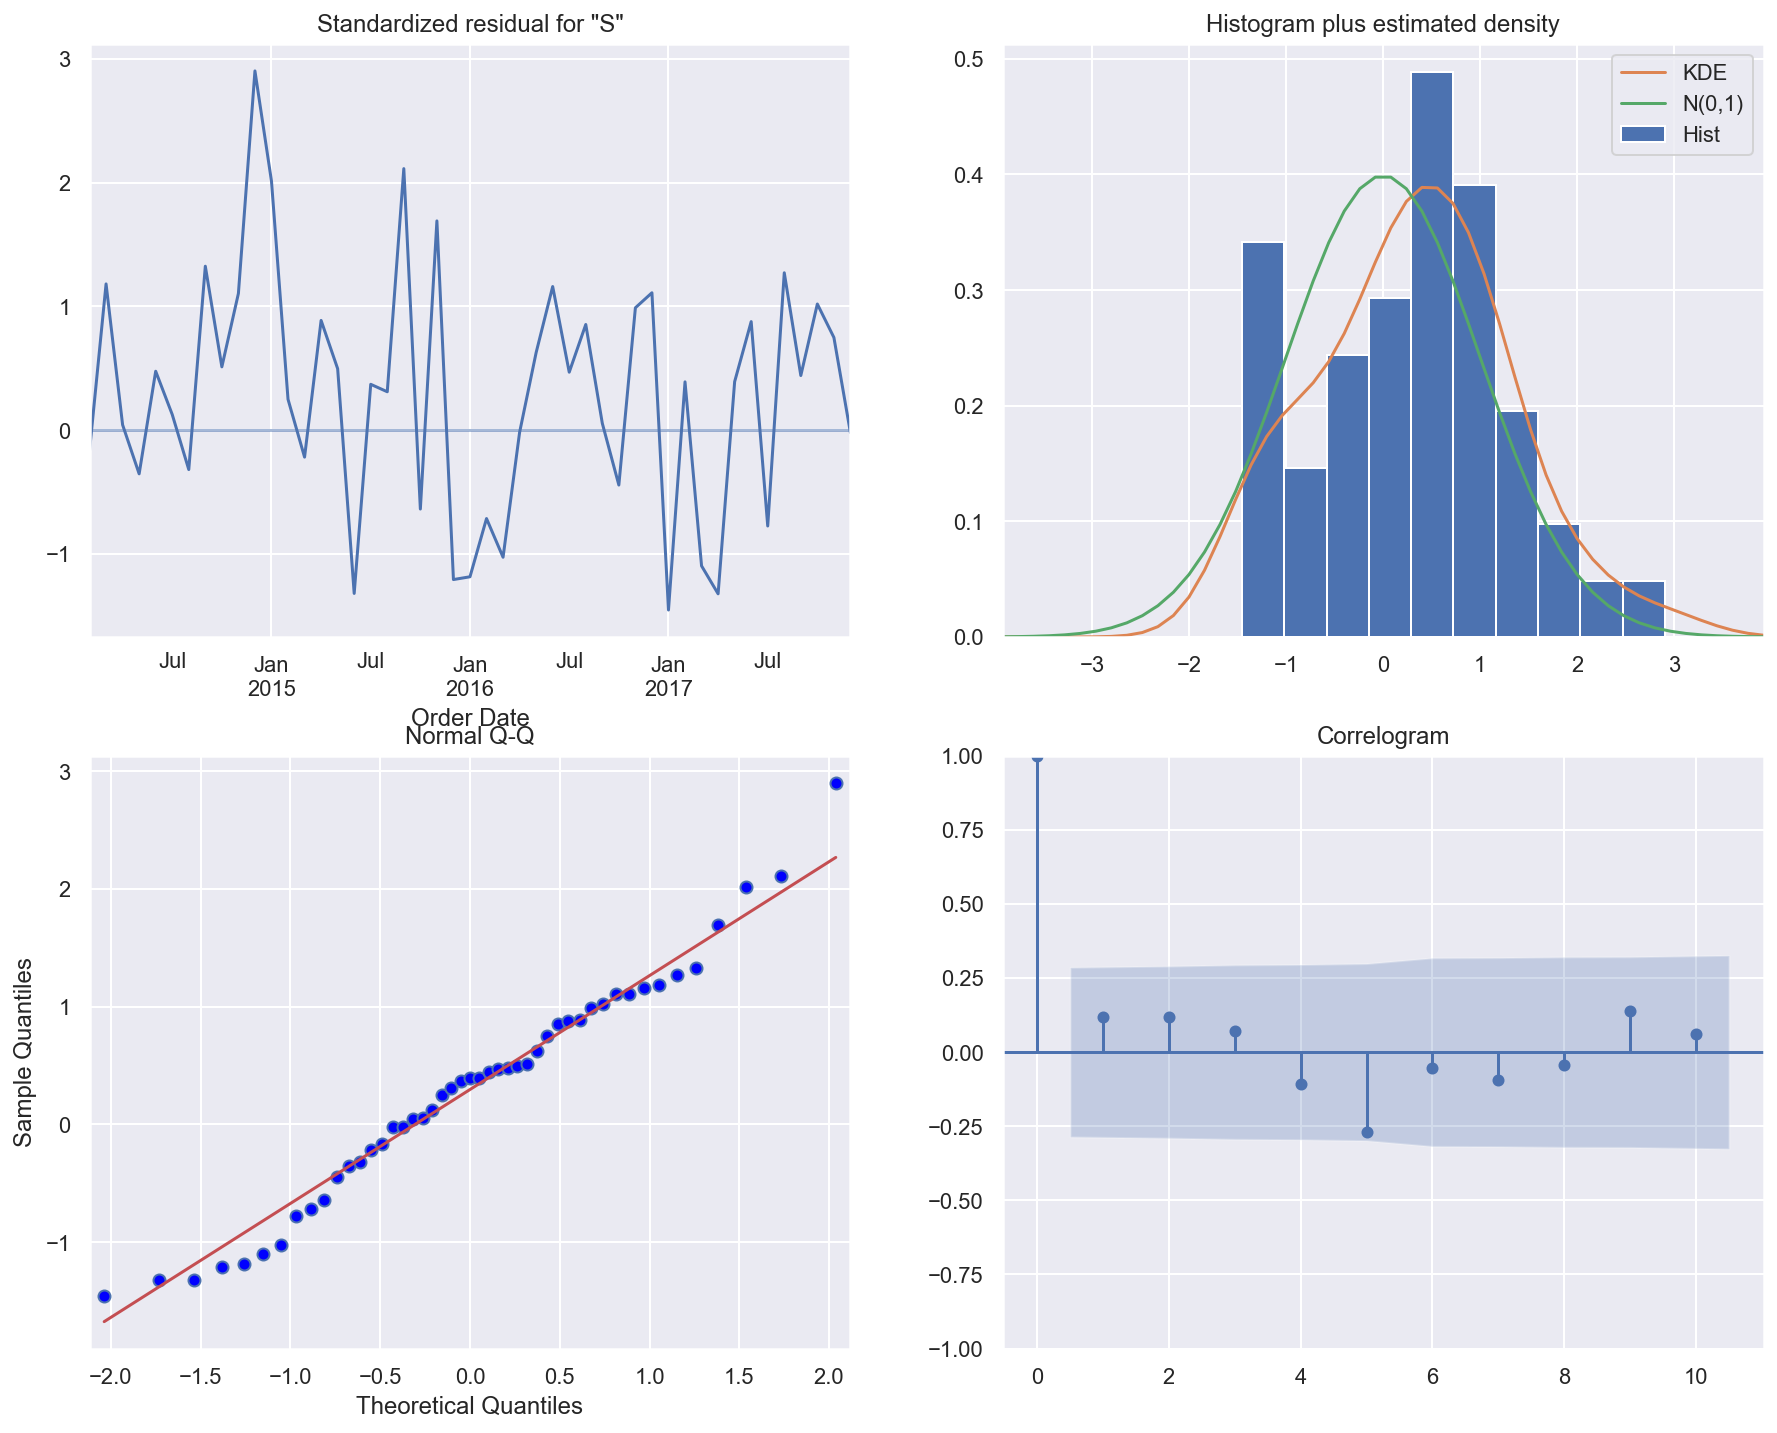

In [42]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [99]:
### validating Forecast 

In [43]:
pred = results.get_prediction(start = pd.to_datetime('2016-01-01'), dynamic = False)
pred_ci = pred.conf_int()

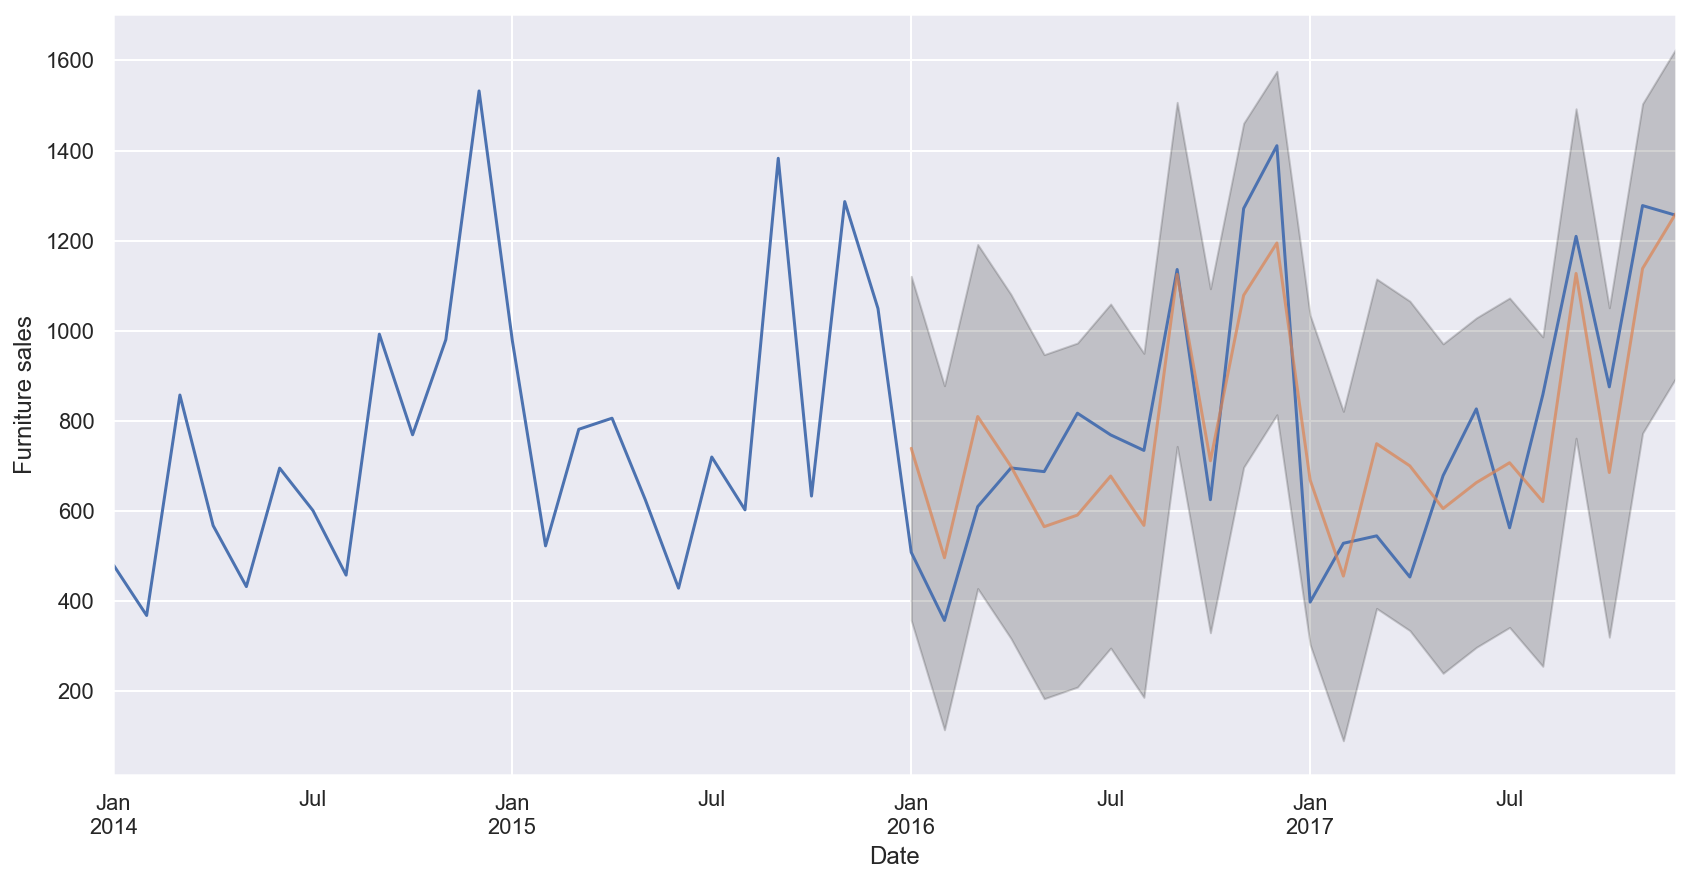

In [44]:
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'forecast', alpha = 0.7, figsize = (14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color = 'k', alpha = 0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture sales')
plt.show()


In [45]:
# compute error 
from sklearn.metrics import mean_squared_error
y_forecasted = pred.predicted_mean
y_true = y['2016':]
rmse = np.sqrt(mean_squared_error(y_true, y_forecasted))
print(rmse)



165.75627862063894


#### Producing and visualising Forecasts 

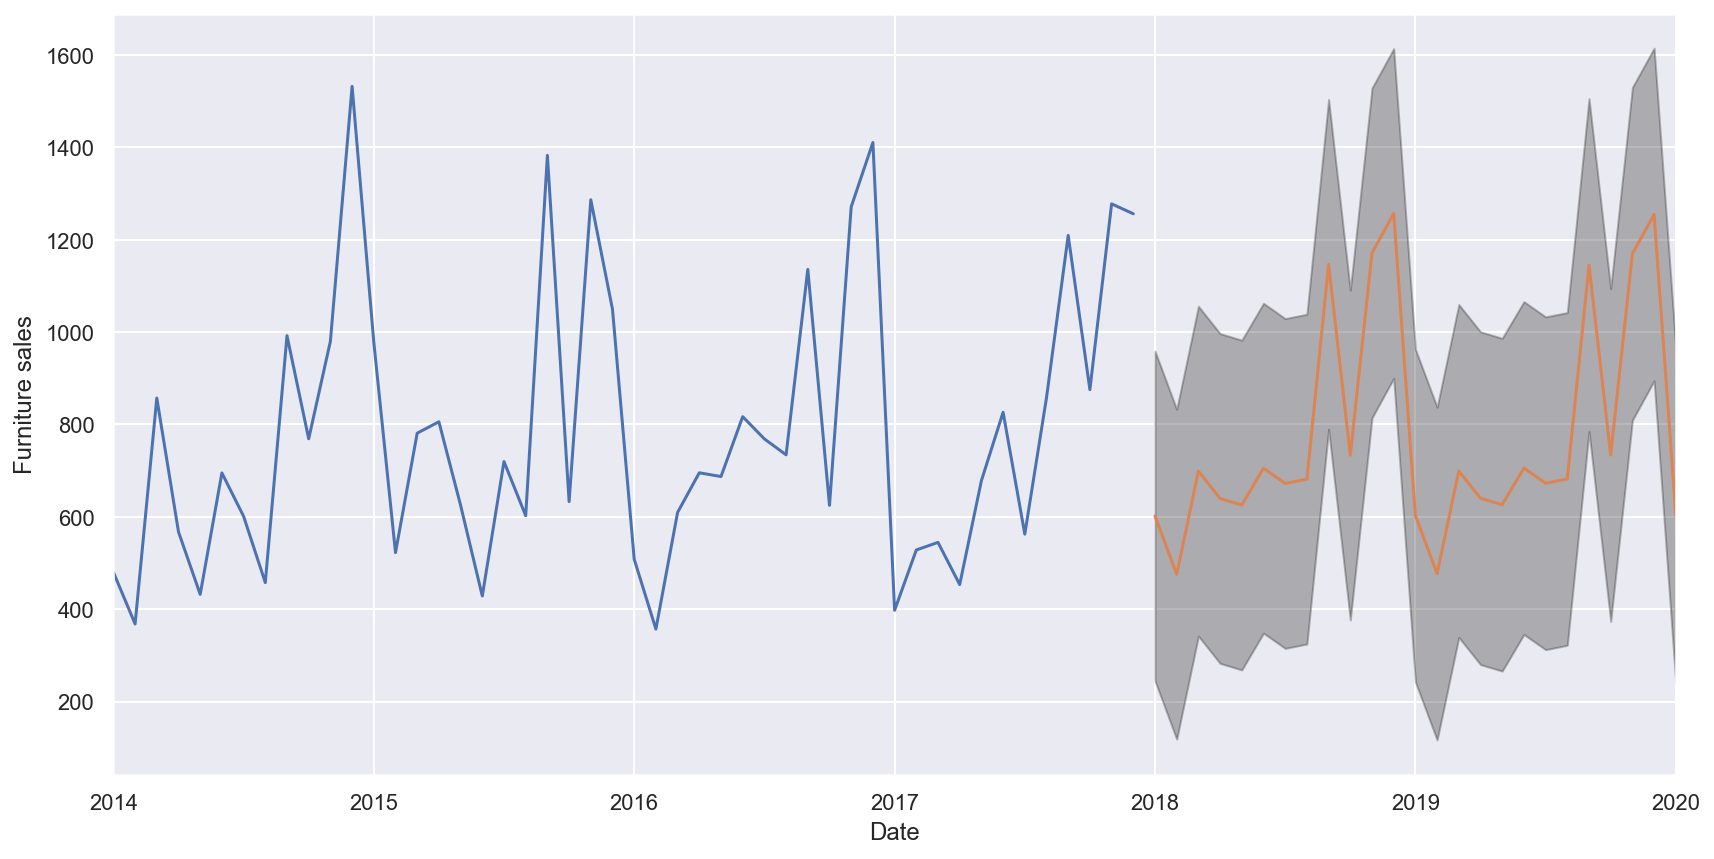

In [46]:
# the number of steps to forecast from the end of the sample 
pred_uc = results.get_forecast(steps = 25)
# returns the confidence of teh fitted parameters 
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14,7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecasted')

# fill the area between two horizontal curves
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color = 'k', alpha = 0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture sales')
plt.show()